In [ ]:
#Fadilah
#21MIS1006

#PC no. = 53 , Hence , ODD ; Hence , Question no.1

#      Instructions
# 1. Do the pre-processing if necessary.
# 2. Write the justification of the selection of model.
# 3. Build the ML model (Use gradient descent / regularization/ boosting if
#    required to get more accuracy. Write the justification for each stage.)
# 4. Use Appropriate evaluation metric to measure the performance of the model
# 5. Upload the python note-book with output.

#   Question 
#   1. Develop a program to classify the mortality outcome either live or dead in the
#   dataset monica.csv using appropriate model and write your observations and
#   inferences.


# Model Selection 
# the selected model is Decision Tree 
   # what is Decision Tree Model - A decision tree is a decision support hierarchical model
   # that uses a tree-like model of decisions and their possible consequences, including 
   # chance event outcomes.
# the given dataset has characteristic data of 13 columns and 6367 entries which is moderate
# we have to classify of the given will be live or dead based on the given values
# and hence we can apply decision tree

# Data Loading and Pre-Processing ( In [3] to In [20] )
# the data has no null values 
# as the data is in Characteristic values it has to LabelEncoded 
# Because the model can work only on numeric data 

# Building of the  ML model - Decision Tree 
# In [20] - Splitting the dataset to Train and Test 80:20 ratio
# In[21] - In[27] - Model and Decision Tree with Gini(In[23]) and Entropy(In[26])  

# Decion Tree Explanation ( Both)
#     using Columns 10-stroke ,6-diabetes ,9-angina(heart problem - chest pain) ,2-age ,8- hichol  
#     we are able to classify whether a person could be live or dead in the fastest manner 
#     If a person has STROKE (yes) and Diabeties (yes) and according to his age he/she live 
#     If a person has STROKE (yes) and Diabeties (yes) and according to his age he/she dead
#     If a person has STROKE (no) and Diabeties (no) and according to his age he/she live
#     If a person has STROKE (yes) and angina (yes) he may dead
#     If a person has STROKE (yes) and angina (no) he may live
#     If a person has STROKE (no) and Diabeties (no) live
#     If a person has STROKE (no) and according to his age and hichol he may live
#     If a person has STROKE (yes) and according to his age and hichol he may live
#     If a person has STROKE (yes) and according to his age and hichol he may dead

# Accuracy Comaparision 
  # Using GINI
  #   Training set score: 0.8800
  #   Test set score: 0.8713
    # Model accuracy score with criterion gini index: 0.8713
    # Training-set accuracy score: 0.8800
    
  # Using Entropy
  #   Training set score: 0.8800
  #   Test set score: 0.8713
    # Model accuracy score with criterion entropy: 0.8713
    # Training-set accuracy score: 0.8800

In [1]:
#import of libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
#load the data 
fileloc='/home/ex5/21MIS1006/Exam/QP/monica.csv'
dataset=pd.read_csv(fileloc)
dataset.head()

,Serial No.,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,live,f,63,85,n,x,n,y,y,n,n,y
1,2,live,m,59,85,y,x,n,y,n,n,n,y
2,3,live,m,68,85,n,n,n,y,n,n,n,y
3,4,live,m,46,85,n,c,n,n,n,n,n,y
4,5,dead,m,48,85,n,n,y,n,n,y,n,y


In [10]:
# dropping column Serial no. -  why? = It will hinder the while processing the model 
dataset=dataset.drop(['Serial No.'],axis=1)

In [11]:
dataset.info()

# on reading the columns our target variable outcome is Column 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6367 entries, 0 to 6366
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outcome   6367 non-null   object
 1   sex       6367 non-null   object
 2   age       6367 non-null   int64 
 3   yronset   6367 non-null   int64 
 4   premi     6367 non-null   object
 5   smstat    6367 non-null   object
 6   diabetes  6367 non-null   object
 7   highbp    6367 non-null   object
 8   hichol    6367 non-null   object
 9   angina    6367 non-null   object
 10  stroke    6367 non-null   object
 11  hosp      6367 non-null   object
dtypes: int64(2), object(10)
memory usage: 597.0+ KB


In [12]:
# Lets see the different classifying object in each column except age and yronset( its numerical data )

col_names=dataset[['outcome','sex','premi','smstat','diabetes','highbp','hichol','angina','stroke','hosp']]
for col in col_names:
    print(dataset[col].value_counts()) 

live    3525
dead    2842
Name: outcome, dtype: int64
m    4605
f    1762
Name: sex, dtype: int64
n     4122
y     1511
nk     734
Name: premi, dtype: int64
c     2051
x     1938
n     1460
nk     918
Name: smstat, dtype: int64
n     4664
nk     885
y      818
Name: diabetes, dtype: int64
y     2877
n     2542
nk     948
Name: highbp, dtype: int64
n     3294
y     1840
nk    1233
Name: hichol, dtype: int64
n     3473
y     1919
nk     975
Name: angina, dtype: int64
n     4881
nk     926
y      560
Name: stroke, dtype: int64
y    4442
n    1925
Name: hosp, dtype: int64


In [13]:
# check missing values in variables
dataset.isnull().sum()

# the Data has no missing values hence the dataset is good

outcome     0
sex         0
age         0
yronset     0
premi       0
smstat      0
diabetes    0
highbp      0
hichol      0
angina      0
stroke      0
hosp        0
dtype: int64

In [17]:
#we are going to convert our dataset from string to unique number 
from sklearn.preprocessing import LabelEncoder

In [19]:
numdata=LabelEncoder()
#to convert outcome  data
dataset.outcome =numdata.fit_transform(dataset['outcome'])
#to convert sex  data
dataset.sex =numdata.fit_transform(dataset['sex'])
#to convert premi  data
dataset.premi =numdata.fit_transform(dataset['premi'])
#to convert smstat  data
dataset.smstat =numdata.fit_transform(dataset['smstat'])
#to convert diabetes  data
dataset.diabetes =numdata.fit_transform(dataset['diabetes'])
#to convert highbp data
dataset.highbp =numdata.fit_transform(dataset['highbp'])
#to convert hichol data
dataset.hichol =numdata.fit_transform(dataset['hichol'])
#to convert angina data
dataset.angina =numdata.fit_transform(dataset['angina'])
#to convert stroke data
dataset.stroke =numdata.fit_transform(dataset['stroke'])
#to convert hosp data
dataset.hosp =numdata.fit_transform(dataset['hosp'])
dataset.head()

,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,0,63,85,0,3,0,2,2,0,0,1
1,1,1,59,85,2,3,0,2,0,0,0,1
2,1,1,68,85,0,1,0,2,0,0,0,1
3,1,1,46,85,0,0,0,0,0,0,0,1
4,0,1,48,85,0,1,2,0,0,2,0,1


In [20]:
#Splitting the dataset 
X1 = dataset.drop(['outcome'],axis=1)
y1 = dataset['outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [22]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.4583333333333333, 0.875, 'x[10] <= 0.5\ngini = 0.494\nsamples = 5093\nvalue = [2272, 2821]'),
 Text(0.25, 0.625, 'x[6] <= 0.5\ngini = 0.004\nsamples = 1550\nvalue = [1547, 3]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 87.5\ngini = 0.012\nsamples = 480\nvalue = [477, 3]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.031\nsamples = 192\nvalue = [189, 3]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 288\nvalue = [288, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1070\nvalue = [1070, 0]'),
 Text(0.6666666666666666, 0.625, 'x[9] <= 0.5\ngini = 0.326\nsamples = 3543\nvalue = [725, 2818]'),
 Text(0.5, 0.375, 'x[8] <= 0.5\ngini = 0.262\nsamples = 3018\nvalue = [467, 2551]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.2\nsamples = 1968\nvalue = [222, 1746]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.358\nsamples = 1050\nvalue = [245, 805]'),
 Text(0.8333333333333334, 0.375, 'x[9] <= 1.5\ngini = 0.5\nsamples = 525\nvalue = [258, 267]'),
 Text(0.75, 0.125, 'gini = 0.2

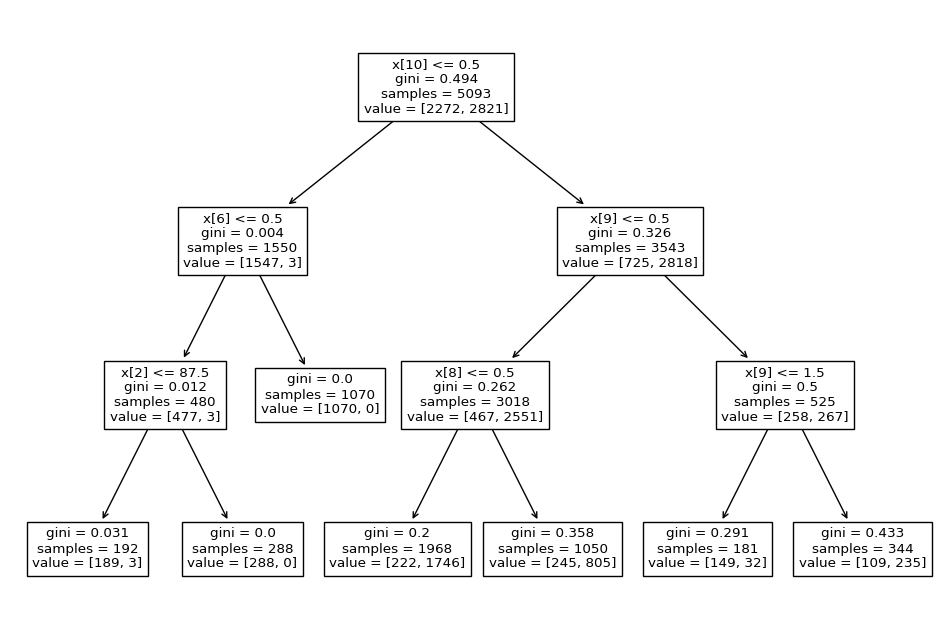

In [23]:
#Plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [24]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8713
Training-set accuracy score: 0.8800


In [30]:
print('Using GINI')
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Using GINI
Training set score: 0.8800
Test set score: 0.8713


In [25]:
#Decision Tree Classifier using entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.4583333333333333, 0.875, 'x[10] <= 0.5\nentropy = 0.992\nsamples = 5093\nvalue = [2272, 2821]'),
 Text(0.25, 0.625, 'x[6] <= 0.5\nentropy = 0.02\nsamples = 1550\nvalue = [1547, 3]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 87.5\nentropy = 0.055\nsamples = 480\nvalue = [477, 3]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.116\nsamples = 192\nvalue = [189, 3]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 288\nvalue = [288, 0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1070\nvalue = [1070, 0]'),
 Text(0.6666666666666666, 0.625, 'x[9] <= 0.5\nentropy = 0.731\nsamples = 3543\nvalue = [725, 2818]'),
 Text(0.5, 0.375, 'x[8] <= 0.5\nentropy = 0.622\nsamples = 3018\nvalue = [467, 2551]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.508\nsamples = 1968\nvalue = [222, 1746]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.784\nsamples = 1050\nvalue = [245, 805]'),
 Text(0.8333333333333334, 0.375, 'x[9] <= 1.5\nentropy = 1.0\nsamples = 525\nvalue = [258, 267]

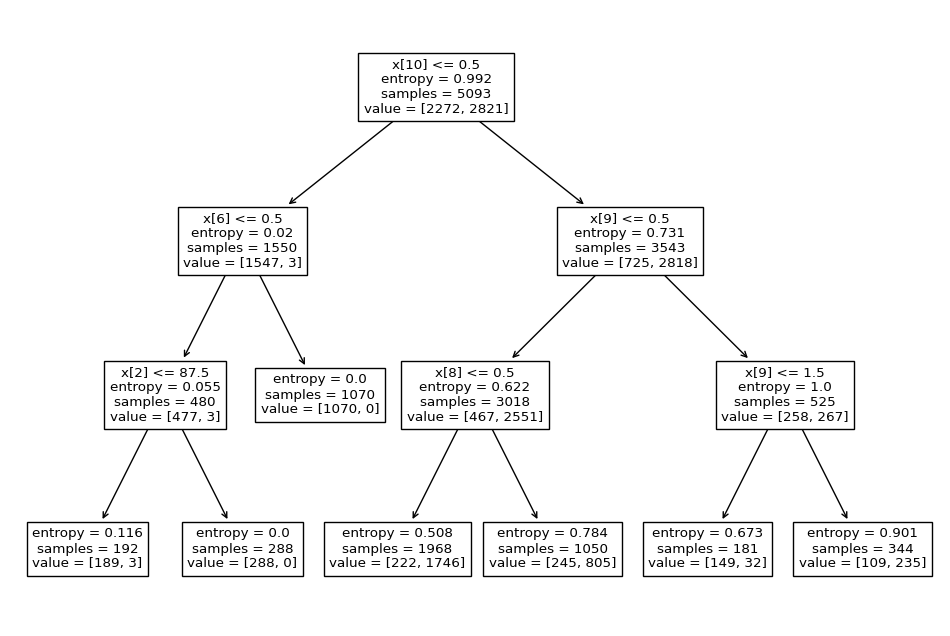

In [26]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [27]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8713
Training-set accuracy score: 0.8800


In [31]:
print('Using Entropy')
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Using Entropy
Training set score: 0.8800
Test set score: 0.8713
